In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
file_path = 'new_dataset.csv'
data = pd.read_csv(file_path)
data.head()


,BeingSalmanKhan,iamsrk
0,BeingSalmanKhan,aamir_khan
1,BeingSalmanKhan,Asli_Jacqueline
2,BeingSalmanKhan,MirzaSania
3,BeingSalmanKhan,realpreityzinta
4,BeingSalmanKhan,TheSlyStallone


In [3]:

# Rename columns for clarity
data.columns = ['Source', 'Target']

# Create a directed graph from the dataset
G = nx.from_pandas_edgelist(data, source='Source', target='Target', create_using=nx.DiGraph())

# Basic analysis
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")



Number of nodes: 313
Number of edges: 469


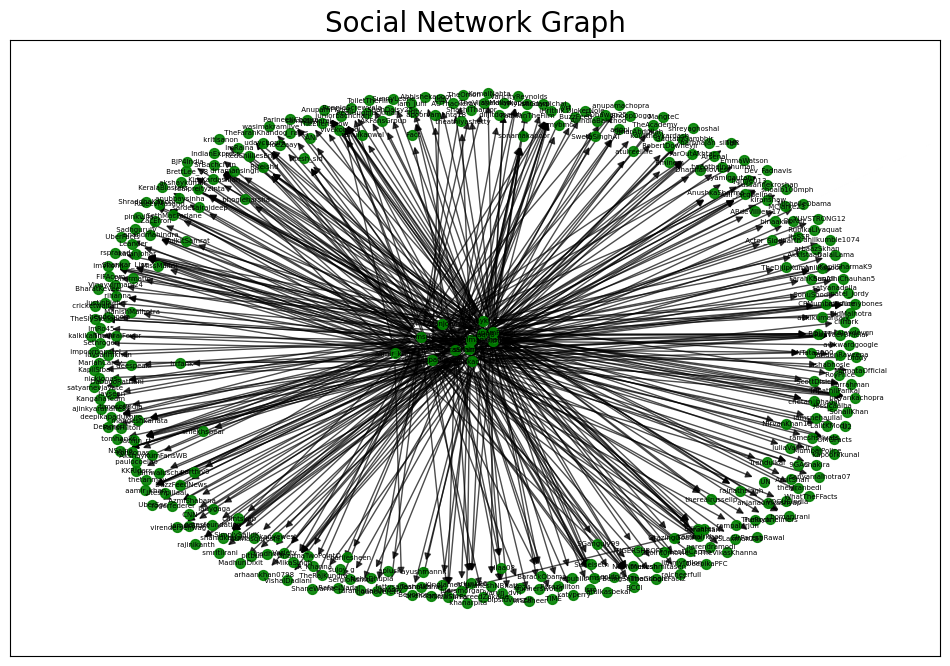

In [4]:
# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Positioning the nodes

nx.draw_networkx_nodes(G, pos, node_size=50,node_color='green', alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color='black', alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=5, font_color='black')

plt.title("Social Network Graph", fontsize=20)
plt.show()

In [37]:

G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 3)])


in_degree_centrality = nx.in_degree_centrality(G)
top_influencers = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Convert to DataFrame
top_influencers_df = pd.DataFrame(top_influencers, columns=["Node", "In-Degree Centrality"])

# Display results
print("Top Influencers:")
print(top_influencers_df)

# Compute graph density
graph_density = nx.density(G)
print("Graph Density:", graph_density)


Top Influencers:
   Node  In-Degree Centrality
0     3              0.666667
1     1              0.333333
2     2              0.333333
3     4              0.333333
Graph Density: 0.4166666666666667


In [59]:
from networkx.algorithms.community import girvan_newman

# Create a sample graph
G = nx.karate_club_graph()  # Example graph

# Apply the Girvan-Newman algorithm
communities = next(girvan_newman(G))

# Compute and print community sizes
community_sizes = [len(c) for c in communities]
print("Community Sizes:", community_sizes)

Community Sizes: [15, 19]


In [60]:
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (1, 5)])

# Select random nodes (first 2 in this case)
random_nodes = list(G.nodes())[:2]
print("Random Nodes:", random_nodes)

# Compute shortest paths from selected nodes
shortest_paths = dict()
for node in random_nodes:
    shortest_paths[node] = nx.single_source_shortest_path_length(G, node)

# Print shortest paths
print("Shortest Paths:")
for source, paths in shortest_paths.items():
    print(f"From Node {source}: {paths}")

Random Nodes: [1, 2]
Shortest Paths:
From Node 1: {1: 0, 2: 1, 5: 1, 3: 2, 4: 2}
From Node 2: {2: 0, 1: 1, 3: 1, 5: 2, 4: 2}


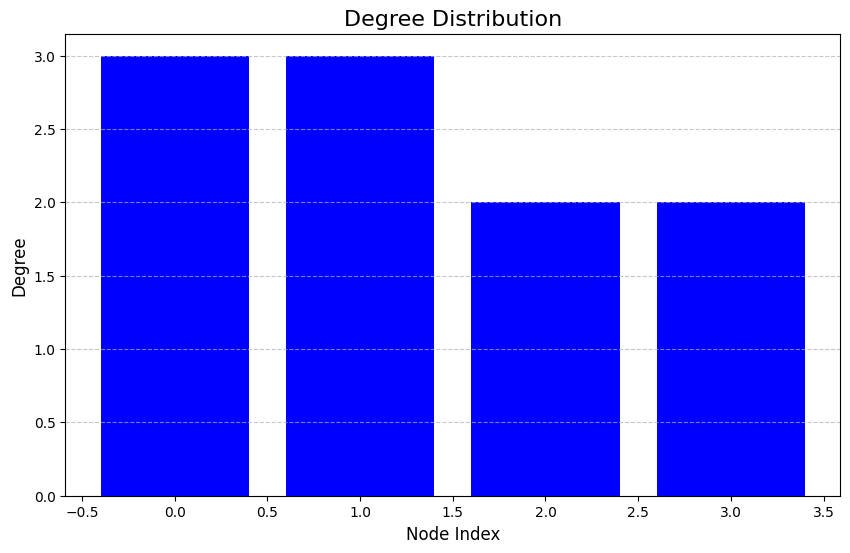

In [61]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 3)])

# Compute the degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Plot the Degree Distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(degree_sequence)), degree_sequence, color="blue")
plt.title("Degree Distribution", fontsize=16)
plt.xlabel("Node Index", fontsize=12)
plt.ylabel("Degree", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [5]:
# Calculate centrality measures
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
degree_centrality = nx.degree_centrality(G)

# Consolidate the results into a DataFrame
centrality_df = pd.DataFrame({
    "Node": list(G.nodes()),
    "Betweenness Centrality": betweenness_centrality.values(),
    "Closeness Centrality": closeness_centrality.values(),
    "Degree Centrality": degree_centrality.values()
})

# Sort by Betweenness Centrality for better insights
centrality_df_sorted = centrality_df.sort_values(by="Betweenness Centrality", ascending=False)


print("Top  Nodes by Betweenness Centrality:")
print(centrality_df_sorted.head(4))

# Save the centrality data to a CSV file for further analysis if needed
centrality_df_sorted.to_csv("centrality_measures.csv", index=False)


Top  Nodes by Betweenness Centrality:
                Node  Betweenness Centrality  Closeness Centrality  \
0    BeingSalmanKhan                     0.0              0.000000   
206           Eminem                     0.0              0.003205   
213             TIME                     0.0              0.003205   
212           aplusk                     0.0              0.003205   

     Degree Centrality  
0             0.073718  
206           0.003205  
213           0.003205  
212           0.003205  


In [63]:
# Calculating centrality measures
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
degree_centrality = nx.degree_centrality(G)

# Consolidating the centrality measures into a DataFrame for better presentation
centrality_df = pd.DataFrame({
    "Node": list(G.nodes()),
    "Betweenness Centrality": betweenness_centrality.values(),
    "Closeness Centrality": closeness_centrality.values(),
    "Degree Centrality": degree_centrality.values()
}).sort_values(by="Betweenness Centrality", ascending=False)

# Display the top 10 nodes by Betweenness Centrality
centrality_df.head(10)


,Node,Betweenness Centrality,Closeness Centrality,Degree Centrality
0,1,0.5,0.50,1.000000
2,3,0.5,0.75,1.000000
3,4,0.5,0.60,0.666667
1,2,0.0,0.50,0.666667


In [64]:
sccs = list(nx.strongly_connected_components(G))

# Find the largest strongly connected component
largest_scc = max(sccs, key=len)

# Create a subgraph for the largest strongly connected component
largest_scc_subgraph = G.subgraph(largest_scc)

# Display the size of the largest SCC and other info
print(f"Size of the largest strongly connected component: {len(largest_scc)}")
print(f"Nodes in the largest SCC: {largest_scc}")

Size of the largest strongly connected component: 4
Nodes in the largest SCC: {1, 2, 3, 4}


In [66]:
if nx.is_strongly_connected(G):
    # Calculate the diameter directly if the graph is strongly connected
    graph_diameter = nx.diameter(G)
    print(f"Diameter of the graph: {graph_diameter}")
else:
    sccs = list(nx.strongly_connected_components(G))
    largest_scc = max(sccs, key=len)
    subgraph = G.subgraph(largest_scc)
    
    # Calculate the diameter of the largest strongly connected component
    graph_diameter = nx.diameter(subgraph)
    print(f"Diameter of the largest strongly connected component: {graph_diameter}")


Diameter of the graph: 3


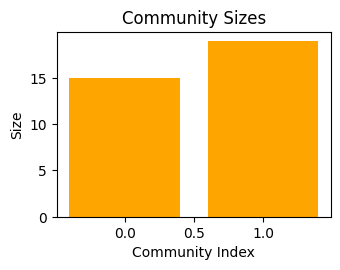

In [67]:
# Community Sizes
plt.subplot(2, 2, 2)
plt.bar(range(len(community_sizes)), community_sizes, color="orange")
plt.title("Community Sizes")
plt.xlabel("Community Index")
plt.ylabel("Size")

plt.tight_layout()
plt.show()
